<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Valuation_of_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rate = np.log(1 + 15/100)
life = 30
paths = 10000

In [3]:
data_df = pd.DataFrame({
    'Year' : 2013 + np.arange(12),
    'CFO' : [14035,	13146,	11880,	11455,	10824,	8023,	25336,	20169,	44327,	44381,	21683,	20301]
})

In [4]:
data_df

,Year,CFO
0,2013,14035
1,2014,13146
2,2015,11880
3,2016,11455
4,2017,10824
5,2018,8023
6,2019,25336
7,2020,20169
8,2021,44327
9,2022,44381


In [5]:
min_CFO = data_df['CFO'].min()
base = min_CFO if min_CFO < 0 else 0

In [6]:
data_df.eval('S = log(CFO - @base + 1.0e-12)', inplace = True)
data_df['prev_S'] = data_df['S'].shift(1)

In [7]:
data_df.dropna(inplace = True)

In [8]:
data_df.eval('r = S - prev_S', inplace = True)

In [9]:
data_df

,Year,CFO,S,prev_S,r
1,2014,13146,9.483873,9.549309,-0.065437
2,2015,11880,9.382612,9.483873,-0.101261
3,2016,11455,9.346182,9.382612,-0.036430
4,2017,10824,9.289521,9.346182,-0.056660
5,2018,8023,8.990068,9.289521,-0.299453
6,2019,25336,10.139982,8.990068,1.149914
7,2020,20169,9.911902,10.139982,-0.228080
8,2021,44327,10.699349,9.911902,0.787447
9,2022,44381,10.700567,10.699349,0.001217
10,2023,21683,9.984284,10.700567,-0.716283


In [10]:
mu = data_df['r'].mean()
sigma = data_df['r'].std()

In [11]:
(mu, sigma)

(0.033555994191304735, 0.5107009901648076)

In [12]:
delta_t = 1/365

In [13]:
W = np.cumsum(np.random.standard_normal(size = [life * 365, paths]), axis = 0) * np.sqrt(delta_t)
t = np.arange(life * 365)[..., np.newaxis] / 365.0

forecast_data = delta_t * np.exp((mu - rate) * t + sigma * W)

In [14]:
forecast_df = pd.DataFrame(
    data = forecast_data,
    columns = [f'DCF_{idx + 1}' for idx in range(paths)],
    index = t[..., 0]
)

In [15]:
pe_ratio = forecast_df.sum().mean()

In [16]:
pe_ratio

40.0801747940442

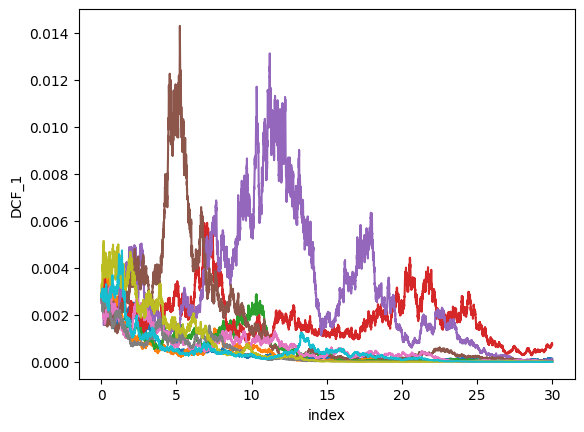

In [17]:
for idx in range(10):
    sns.lineplot(x = 'index', y = f'DCF_{idx + 1}', data = forecast_df.reset_index())

In [18]:
forecast_df

,DCF_1,DCF_2,DCF_3,DCF_4,DCF_5,DCF_6,DCF_7,DCF_8,DCF_9,DCF_10,...,DCF_9991,DCF_9992,DCF_9993,DCF_9994,DCF_9995,DCF_9996,DCF_9997,DCF_9998,DCF_9999,DCF_10000
0.000000,0.002810,0.002684,0.002690,0.002855,0.002675,0.002896,0.002713,0.002601,0.002847,2.761112e-03,...,0.002666,0.002768,0.002867,0.002723,0.002812,0.002732,0.002839,0.002720,0.002679,0.002681
0.002740,0.002926,0.002700,0.002791,0.002810,0.002716,0.002833,0.002613,0.002591,0.002875,2.776833e-03,...,0.002854,0.002765,0.002881,0.002732,0.002819,0.002841,0.002851,0.002749,0.002750,0.002634
0.005479,0.002815,0.002679,0.002777,0.002721,0.002733,0.002876,0.002609,0.002592,0.002843,2.838149e-03,...,0.002746,0.002718,0.002753,0.002655,0.002907,0.002782,0.002882,0.002686,0.002724,0.002600
0.008219,0.002722,0.002674,0.002755,0.002788,0.002696,0.002871,0.002522,0.002598,0.002818,2.914781e-03,...,0.002800,0.002616,0.002860,0.002625,0.002808,0.002776,0.002749,0.002641,0.002661,0.002697
0.010959,0.002712,0.002805,0.002659,0.002721,0.002734,0.002856,0.002544,0.002636,0.002812,2.922838e-03,...,0.002730,0.002638,0.002800,0.002663,0.002762,0.002720,0.002735,0.002535,0.002609,0.002559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.986301,0.000143,0.000035,0.000016,0.000801,0.000093,0.000041,0.000020,0.000023,0.000006,2.806295e-07,...,0.000082,0.000007,0.015239,0.000013,0.026438,0.000002,0.000002,0.002270,0.000049,0.000015
29.989041,0.000143,0.000035,0.000016,0.000770,0.000091,0.000041,0.000020,0.000024,0.000006,2.768885e-07,...,0.000080,0.000006,0.014765,0.000013,0.026382,0.000002,0.000002,0.002284,0.000048,0.000015
29.991781,0.000142,0.000033,0.000016,0.000777,0.000091,0.000042,0.000020,0.000024,0.000006,2.762825e-07,...,0.000079,0.000006,0.014380,0.000012,0.027231,0.000002,0.000002,0.002227,0.000050,0.000015
29.994521,0.000137,0.000033,0.000016,0.000756,0.000088,0.000044,0.000020,0.000024,0.000006,2.768685e-07,...,0.000084,0.000006,0.014153,0.000012,0.027890,0.000002,0.000002,0.002191,0.000050,0.000015
